# Ship Image Classification using Deep Learning
#### Ahsan Khan | 11-26-2024
##### [Github Repository](https://github.com/Ahsanakhan/CSCA-5642-Final-Project)

## Introduction
This project focuses on developing a deep learning model to classify different types of ships based on images. The task is part of a Deep Learning Hackathon organized by Analytics Vidhya, aiming to showcase the application of computer vision techniques in maritime domain awareness. In today's global maritime landscape, rapid and accurate ship identification is crucial for:
- Maritime security
- Port efficiency
- Environmental protection
- Trade monitoring
- Search and rescue operations

This project leverages deep learning to automate ship classification from visual data, addressing limitations of traditional manual and radio-based identification methods.

## Dataset Overview
- Source: **[Analytics Vidhya Deep Learning Hackathon](https://www.kaggle.com/datasets/arpitjain007/game-of-deep-learning-ship-datasets/code)**
- Contents: 6,252 training images and 2,680 test images
- Categories: 5 ship types (Cargo, Military, Carrier, Cruise, Tankers)
- Image format: Various sizes, RGB color

## Project Objective
The main objective is to develop and compare different deep learning models for accurate ship classification, ultimately selecting the best performing model for potential real-world applications.
## Methodology
1. **Data Loading and Initial Exploration:** We'll load our dataset using pandas and examine it's structure and do some initial exploration.
2. **Exploratory Data Analysis (EDA):** Next, we'll visualize the distribution of ship categories using a bar plot and display some sample images from each category to underatnd the image and we'll also analyze image dimensions and color modes.
3. **Data Preprocessing:** We'll do data preprocessing that'll include image resizing, data augmentatio, normalization and data splitting.
4. **Model Development:** We'll develop several models such as Simple CNN, Complx CNN, Transfer Learning with ResNet50 and Transfer Learning with MobileNetV2.
5. **Model Evaluation and Comparison:** We'll evaluate each model performace and compare their learning curves and test accuracies.
6. **Hyperparameter Tuning:** Then we'll utilize Keras Tuner to perform hyperparameter optimization on the best performing model.
7. **Results and Analysis:** In the end, we'll plot the final best hypertuned model and compare it's results with the original model.
8. **Conclusion and Discussion:** Then we'll conclude our project findings and discuss some future improvements.

Let's start by loading the data and performing an initial exploration to understand its structure.


## Data Loading and Initial Exploration

In this step, we'll import the necessary Python libraries and load the dataset to begin our analysis. We'll use `pandas` to handle the data, `numpy` for numerical operations, and `matplotlib` and `seaborn` for data visualization. Let's start by loading the data into a pandas DataFrame and displaying the first few rows to get a sense of the dataset.


In [20]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import ResNet50, MobileNetV2
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

import warnings
warnings.filterwarnings("ignore")


# Load the train.csv file
train_df = pd.read_csv('train/train.csv')

# Display the first few rows and basic information about the dataset
print(train_df.head())
print("\nDataset Info:")
print(train_df.info())

# Display the class distribution
print("\nClass Distribution:")
print(train_df['category'].value_counts())

# Check for missing values
print("\nMissing Values:")
print(train_df.isnull().sum())

         image  category
0  2823080.jpg         1
1  2870024.jpg         1
2  2662125.jpg         2
3  2900420.jpg         3
4  2804883.jpg         2

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6252 entries, 0 to 6251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   image     6252 non-null   object
 1   category  6252 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 97.8+ KB
None

Class Distribution:
category
1    2120
5    1217
2    1167
3     916
4     832
Name: count, dtype: int64

Missing Values:
image       0
category    0
dtype: int64


**Dataset Structure:**
- The training dataset contains 6,252 entries.
- There are two columns: 'image' (object type, likely containing image filenames) and 'category' (int64 type, representing the ship category).

**Class Distribution:**
- Category 1 (Cargo): 2120 images
- Category 5 (Tankers): 1217 images
- Category 2 (Military): 1167 images
- Category 3 (Carrier): 916 images
- Category 4 (Cruise): 832 images

The dataset is imbalanced, with Cargo ships being the most common and Cruise ships the least common.

**Missing Values:**
- There are no missing values in the dataset, which is good for our analysis.

## Exploratory Data Analysis (EDA)

In this step, we'll visualize the class dictribution and examine some sample images. We'll create a bar plot to show the ditribution of ship categories, we'll also display 5 sample images from each category and lastly we'll also print the dimensions and colors modes.


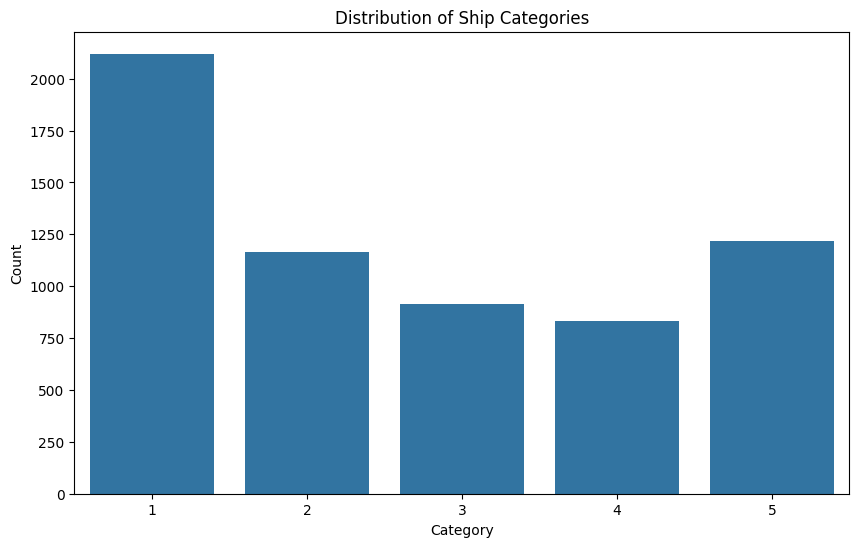

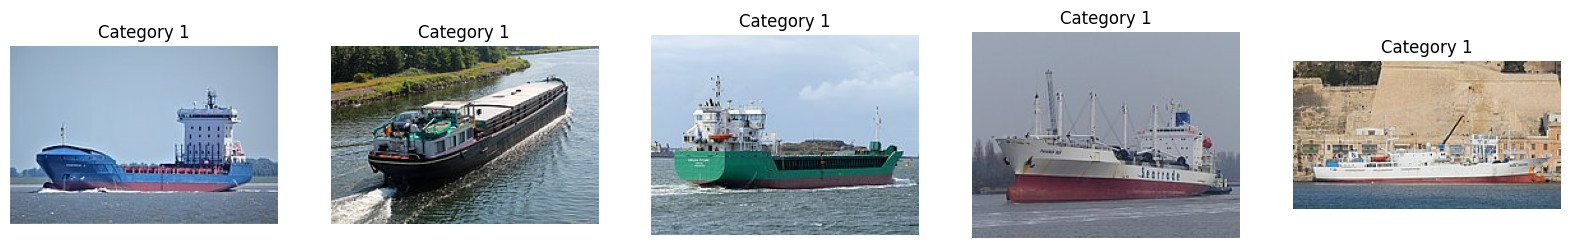

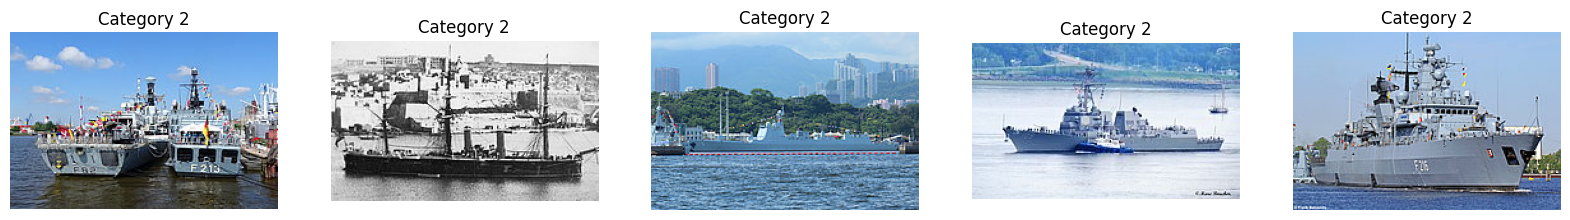

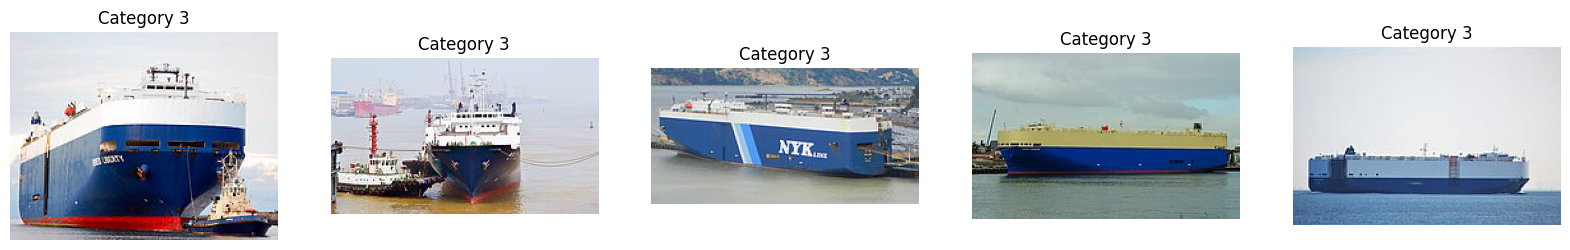

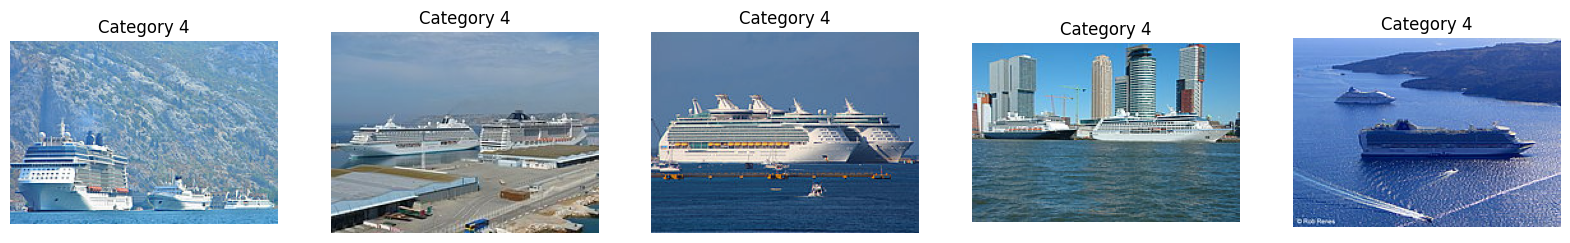

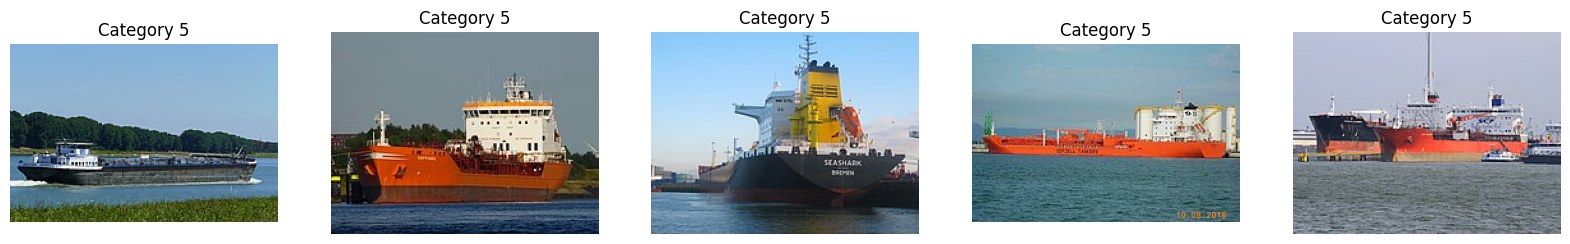

Image dimensions: (210, 140)
Image mode: RGB


In [2]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=train_df)
plt.title('Distribution of Ship Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Function to display sample images
def display_sample_images(category, num_samples=5):
    category_images = train_df[train_df['category'] == category]['image'].sample(num_samples).values
    plt.figure(figsize=(20, 4))
    for i, img_name in enumerate(category_images):
        img_path = os.path.join('train', 'images', img_name)
        img = Image.open(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.title(f'Category {category}')
        plt.axis('off')
    plt.show()

# Display sample images for each category
for category in range(1, 6):
    display_sample_images(category)

# Get image dimensions
img_path = os.path.join('train', 'images', train_df['image'].iloc[0])
img = Image.open(img_path)
print(f"Image dimensions: {img.size}")
print(f"Image mode: {img.mode}")

**Distribution of Ship Categories:**
- The bar plot confirms our earlier observation about class imbalance:

    - Category 1 (Cargo) is the most prevalent
    - Categories 2 (Military) and 5 (Tankers) have similar frequencies
    - Categories 3 (Carrier) and 4 (Cruise) are the least common


**Sample Images:**

- Category 1 (Cargo): Various types of cargo ships, including container ships and smaller vessels
- Category 2 (Military): Warships, including destroyers and patrol boats
- Category 3 (Carrier): Large car carriers and roll-on/roll-off (RoRo) ships
- Category 4 (Cruise): Cruise ships in various settings
- Category 5 (Tankers): Oil tankers and other liquid cargo vessels


**Image Properties:**

- Dimensions: 210x140 pixels
- Color Mode: RGB (full color)

## Data Preprocessing
We'll now implement a data preprocessing timelines and that'll include normalization, data augemntation and proper data loading.

Found 5001 validated image filenames belonging to 5 classes.
Found 1251 validated image filenames belonging to 5 classes.


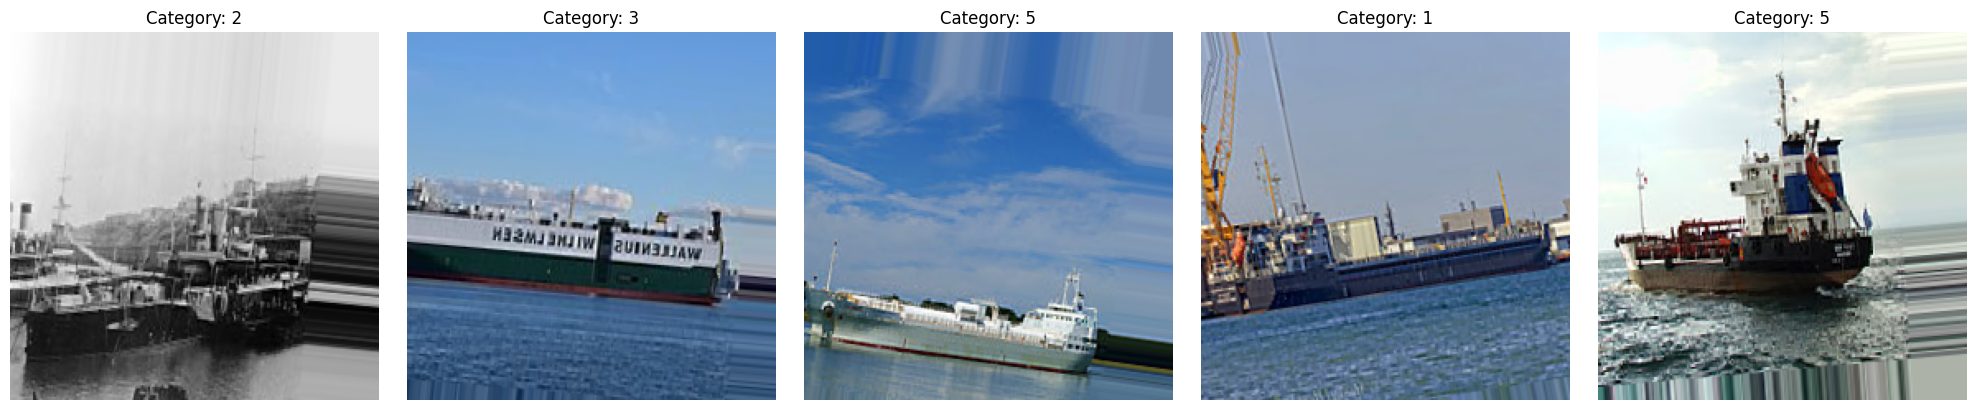

Number of training samples: 5001
Number of validation samples: 1251
Number of classes: 5
Class mapping: {'1': 0, '2': 1, '3': 2, '4': 3, '5': 4}


In [4]:
# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
TRAIN_DIR = 'train/images'
VALIDATION_SPLIT = 0.2

# Load the CSV file
df = pd.read_csv('train/train.csv')

# Convert integer categories to strings
df['category'] = df['category'].astype(str)

# Split the data into train and validation sets
train_df, val_df = train_test_split(df, test_size=VALIDATION_SPLIT, stratify=df['category'], random_state=42)

# Reset index for both dataframes
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

# Create ImageDataGenerator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Create ImageDataGenerator for validation data
val_datagen = ImageDataGenerator(rescale=1./255)

# Set up the generators
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Function to display augmented images
def show_augmented_images(generator, num_images=5):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        batch = next(generator)
        image = batch[0][0]
        plt.imshow(image)
        plt.title(f"Category: {np.argmax(batch[1][0]) + 1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display some augmented images
show_augmented_images(train_generator)

print("Number of training samples:", len(train_generator.filenames))
print("Number of validation samples:", len(val_generator.filenames))
print("Number of classes:", len(train_generator.class_indices))
print("Class mapping:", train_generator.class_indices)

**Image Augmentation:**
The displayed images show successful augmentation, including:

- Rotations
- Horizontal flips (evident in some images)
- Zoom and shift effects
- This variety will help our model generalize better.


**Dataset Split:**

- Training samples: 5001
- Validation samples: 1251
- This split roughly follows our 80/20 train/validation split, which is appropriate.


**Class Distribution:**
We have 5 classes, as expected, mapped to integers 0-4:

- '1' (Cargo) -> 0
- '2' (Military) -> 1
- '3' (Carrier) -> 2
- '4' (Cruise) -> 3
- '5' (Tankers) -> 4


**Image Preprocessing:**

- Images are successfully loaded and resized to 224x224 pixels.
- Pixel values are rescaled to the range [0, 1].


## Model Development
In this step, we'll build our models. We'll implement four models one by one: a simple CNN, a complex CNN model, a transfer learning model using ResNet50, and MobileNetV2 model. For each model, we'll train it, plot its performance, and save the results. After that, we'll compare all models and identify the best performing model.
## Simple CNN Model
Let's start by building our first model. We'll use a smaller image size withreduced subset size for 20 epochs.

Found 1000 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.
Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - accuracy: 0.3214 - loss: 1.5895 - val_accuracy: 0.3800 - val_loss: 1.5166
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.3657 - loss: 1.5353 - val_accuracy: 0.3800 - val_loss: 1.4875
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.3632 - loss: 1.5058 - val_accuracy: 0.3750 - val_loss: 1.4883
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step - accuracy: 0.3604 - loss: 1.5061 - val_accuracy: 0.3700 - val_loss: 1.4633
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 92ms/step - accuracy: 0.3858 - loss: 1.4678 - val_accuracy: 0.3950 - val_loss: 1.4275
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.3706 - loss: 1.4318 - val_accuracy: 0.4000 - val_loss: 1.4592
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - accuracy: 0.4419 - loss: 1.3975 - val_accuracy: 0.4650 - val_lo

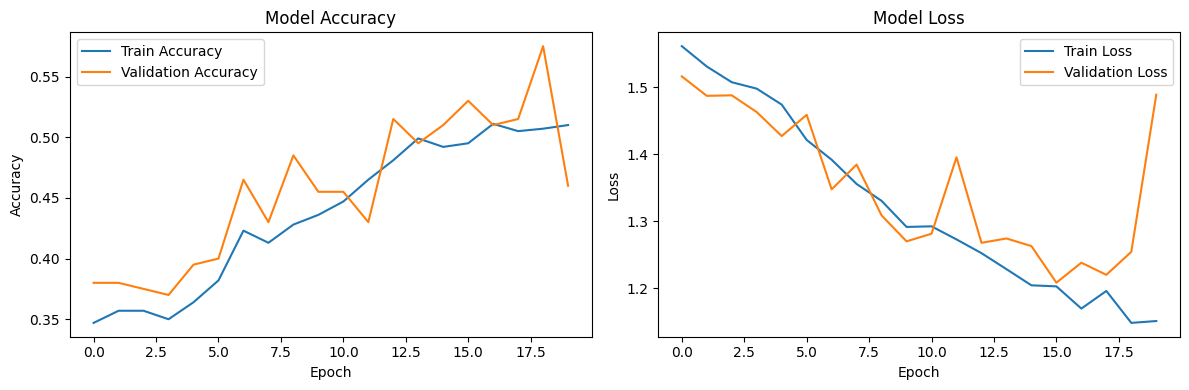

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.4470 - loss: 1.5508
Test accuracy: 0.4600
Simple CNN - Final training accuracy: 0.5100
Simple CNN - Final validation accuracy: 0.4600
Simple CNN - Test accuracy: 0.4600


In [15]:
# Constants
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 32
SUBSET_SIZE = 1000

# Modify the data generators
train_subset = train_df.sample(n=SUBSET_SIZE, random_state=42)
val_subset = val_df.sample(n=SUBSET_SIZE//5, random_state=42)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


model_cnn = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(5, activation='softmax')
])

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Train the model
history_cnn = model_cnn.fit(
    train_generator,
    epochs=20,  # Further reduced
    validation_data=val_generator
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_acc = model_cnn.evaluate(val_generator)
print(f"Test accuracy: {test_acc:.4f}")


simple_cnn_results = {
    'model': model_cnn,
    'history': history_cnn,
    'test_accuracy': test_acc
}

#some key metrics
print(f"Simple CNN - Final training accuracy: {history_cnn.history['accuracy'][-1]:.4f}")
print(f"Simple CNN - Final validation accuracy: {history_cnn.history['val_accuracy'][-1]:.4f}")
print(f"Simple CNN - Test accuracy: {test_acc:.4f}")

**Training Progress:**

- The model trained for 20 epochs.
- Training accuracy improved from about 32.14% to 52.32%.
- Validation accuracy fluctuated, starting at 38.00% and ending at 46.00%.


**Final Performance:**

- Test accuracy: 46.60%


## Complex CNN Model
Let's now create a complex CNN model, we'll increase the number of layers and add some regularization and will increase the subset size.

Found 3000 validated image filenames belonging to 5 classes.
Found 600 validated image filenames belonging to 5 classes.
Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.2478 - loss: 2.4218 - val_accuracy: 0.3450 - val_loss: 1.6812
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3175 - loss: 1.9528 - val_accuracy: 0.3117 - val_loss: 1.7010
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.4048 - loss: 1.6206 - val_accuracy: 0.1767 - val_loss: 3.0212
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.4668 - loss: 1.4346 - val_accuracy: 0.1933 - val_loss: 1.9086
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.4898 - loss: 1.3283 - val_accuracy: 0.2667 - val_loss: 1.7978
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 80s 2s/step - accuracy: 0.5542 - loss: 1.1586 - val_accuracy: 0.2150 - val_loss: 1.8725


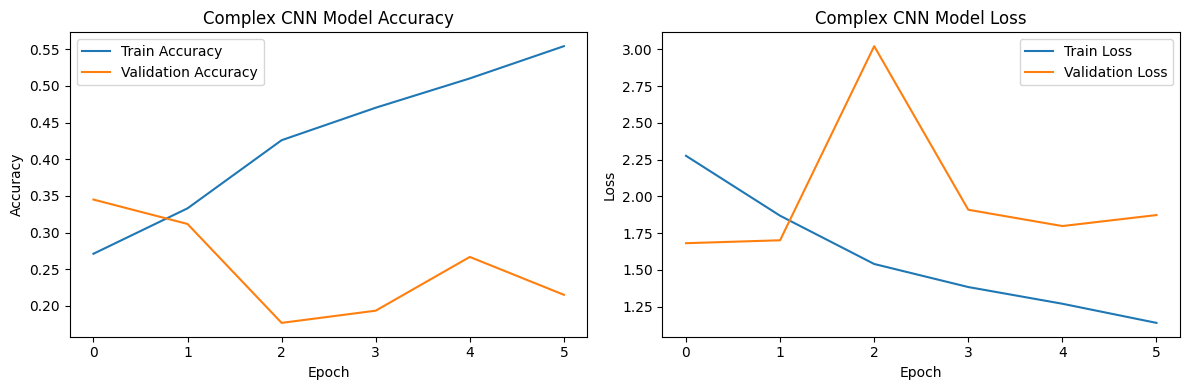

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 266ms/step - accuracy: 0.3596 - loss: 1.6528
Complex CNN Test accuracy: 0.3450


In [12]:
# Constants
IMG_HEIGHT = 128
IMG_WIDTH = 128
BATCH_SIZE = 64
SUBSET_SIZE = 3000

# Modify the data generators
train_subset = train_df.sample(n=SUBSET_SIZE, random_state=42)
val_subset = val_df.sample(n=SUBSET_SIZE//5, random_state=42)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


def create_complex_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(512, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),
        Dense(5, activation='softmax')
    ])
    return model

# Create and compile the model
model_complex_cnn = create_complex_cnn()
model_complex_cnn.compile(optimizer=Adam(learning_rate=0.001),
                          loss='categorical_crossentropy',
                          metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history_complex_cnn = model_complex_cnn.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_complex_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_complex_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title('Complex CNN Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_complex_cnn.history['loss'], label='Train Loss')
plt.plot(history_complex_cnn.history['val_loss'], label='Validation Loss')
plt.title('Complex CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_acc = model_complex_cnn.evaluate(val_generator)
print(f"Complex CNN Test accuracy: {test_acc:.4f}")

# Save the results for later comparison
complex_cnn_results = {
    'model': model_complex_cnn,
    'history': history_complex_cnn,
    'test_accuracy': test_acc
}

**Training Progress:**

- The model trained for 6 epochs before early stopping was triggered.
- Training accuracy improved from about 24.78% to 55.42%.
- Validation accuracy fluctuated, starting at 34.50% and ending at 21.50%.


**Final Performance:**

- Test accuracy: 34.50%


Excellent! Let's implement a transfer learning model using ResNet50. This approach should give us a significant performance boost. We'll use the pre-trained ResNet50 as a feature extractor and add our own classification layers on top.
Here's the code for our ResNet50 transfer learning model:

## ResNet50 Model
Now, we'll implement a transfer learning model using ResNet50. We'll add custom classification layers on top of it and wil freeze the base model weights to use as a feature extractor. We'll also evaluate our model on the validation set.

Found 2000 validated image filenames belonging to 5 classes.
Found 400 validated image filenames belonging to 5 classes.
Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 188s 3s/step - accuracy: 0.2494 - loss: 1.7890 - val_accuracy: 0.3650 - val_loss: 1.5165
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 182s 3s/step - accuracy: 0.3302 - loss: 1.5634 - val_accuracy: 0.3650 - val_loss: 1.5265
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.3079 - loss: 1.5756 - val_accuracy: 0.3650 - val_loss: 1.5209
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.3190 - loss: 1.5637 - val_accuracy: 0.3650 - val_loss: 1.5175
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 197s 3s/step - accuracy: 0.3416 - loss: 1.5503 - val_accuracy: 0.3650 - val_loss: 1.5089
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 193s 3s/step - accuracy: 0.3333 - loss: 1.5596 - val_accuracy: 0.3650 - val_loss: 1.5070
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 186s 3s/step - accuracy: 0.3577 - loss: 1.5449 - val_accuracy: 0.3650 - val_los

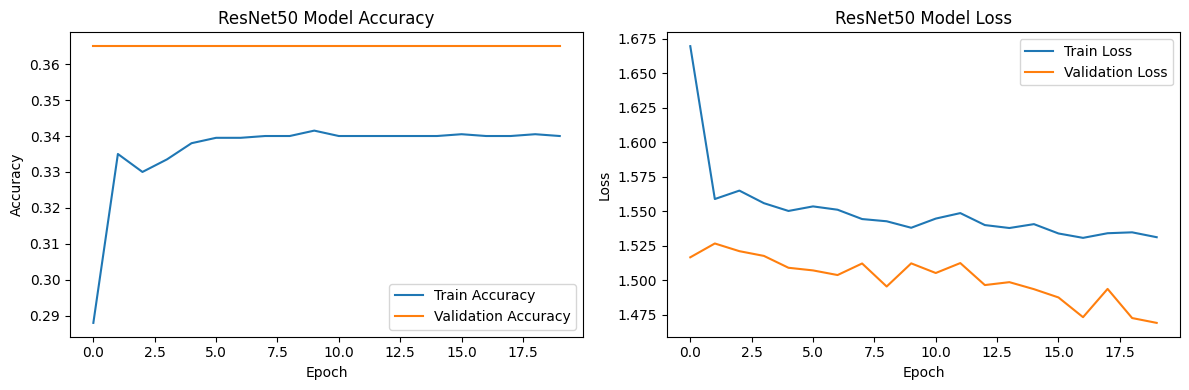

13/13 ━━━━━━━━━━━━━━━━━━━━ 25s 2s/step - accuracy: 0.3560 - loss: 1.4773
ResNet50 Test accuracy: 0.3650


In [10]:
# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
SUBSET_SIZE = 2000

# Modify the data generators
train_subset = train_df.sample(n=SUBSET_SIZE, random_state=42)
val_subset = val_df.sample(n=SUBSET_SIZE//5, random_state=42)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False  # Freeze the base model

model_resnet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model_resnet.compile(optimizer=Adam(learning_rate=0.001),
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

# Train the model
history_resnet = model_resnet.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_resnet.history['accuracy'], label='Train Accuracy')
plt.plot(history_resnet.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_resnet.history['loss'], label='Train Loss')
plt.plot(history_resnet.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_acc = model_resnet.evaluate(val_generator)
print(f"ResNet50 Test accuracy: {test_acc:.4f}")

# Save the results for later comparison
resnet_results = {
    'model': model_resnet,
    'history': history_resnet,
    'test_accuracy': test_acc
}

**Training Progress:**

- The model trained for all 20 epochs.
- Training accuracy improved from about 24.94% to 34.19%.
- Validation accuracy remained constant at 36.50% throughout the training.


**Final Performance:**

- Test accuracy: 36.50%

## MobileNetV2 Model
We'll now try a lightweight model and see how it performs on our data. We'll use MobileNetV2 model that is best desinged for efficiency.We'll add a simple top layer for our classification task, we'll also use early stopping to prevent overfitting. We'll also use subset size of 3000 samples.

Found 3000 validated image filenames belonging to 5 classes.
Found 600 validated image filenames belonging to 5 classes.
Epoch 1/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.4944 - loss: 1.2769 - val_accuracy: 0.7550 - val_loss: 0.5841
Epoch 2/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.7403 - loss: 0.6822 - val_accuracy: 0.7600 - val_loss: 0.5366
Epoch 3/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.7787 - loss: 0.5757 - val_accuracy: 0.7817 - val_loss: 0.5049
Epoch 4/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.7740 - loss: 0.5570 - val_accuracy: 0.7900 - val_loss: 0.5026
Epoch 5/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.7993 - loss: 0.5080 - val_accuracy: 0.7867 - val_loss: 0.5093
Epoch 6/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.8069 - loss: 0.4766 - val_accuracy: 0.8017 - val_loss: 0.4715
Epoch 7/30
94/94 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.8203 - loss: 0.4704 - val_accuracy: 0.8050 - val_los

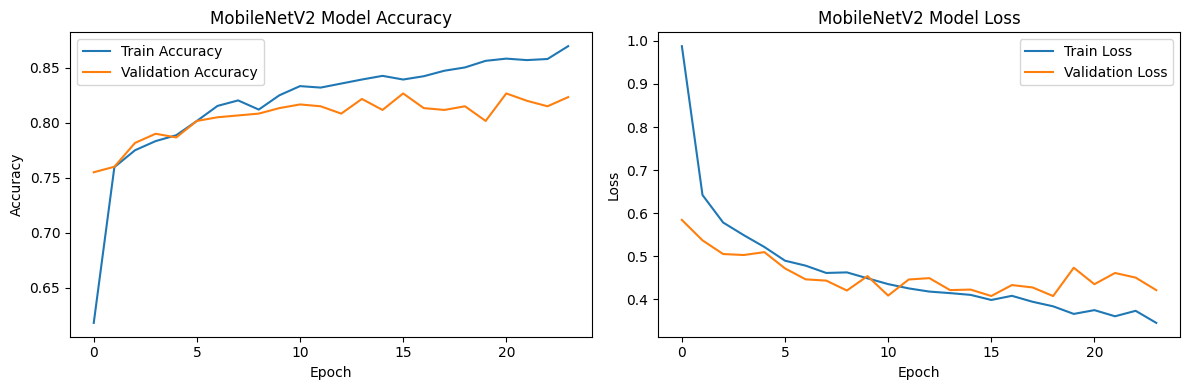

19/19 ━━━━━━━━━━━━━━━━━━━━ 13s 690ms/step - accuracy: 0.8151 - loss: 0.4288
MobileNetV2 Test accuracy: 0.8150


In [13]:
# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
SUBSET_SIZE = 3000

# Modify the data generators
train_subset = train_df.sample(n=SUBSET_SIZE, random_state=42)
val_subset = val_df.sample(n=SUBSET_SIZE//5, random_state=42)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
base_model.trainable = False  # Freeze the base model initially

model_mobilenet = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')
])

# Compile the model
model_mobilenet.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator,
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_mobilenet.history['accuracy'], label='Train Accuracy')
plt.plot(history_mobilenet.history['val_accuracy'], label='Validation Accuracy')
plt.title('MobileNetV2 Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_mobilenet.history['loss'], label='Train Loss')
plt.plot(history_mobilenet.history['val_loss'], label='Validation Loss')
plt.title('MobileNetV2 Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate the model
test_loss, test_acc = model_mobilenet.evaluate(val_generator)
print(f"MobileNetV2 Test accuracy: {test_acc:.4f}")

# Save the results for later comparison
mobilenet_results = {
    'model': model_mobilenet,
    'history': history_mobilenet,
    'test_accuracy': test_acc
}

**Training Progress:**

- The model trained for 24 epochs before early stopping was triggered.
- Training accuracy improved from about 49.44% to 86.62%.
- Validation accuracy improved from 75.50% to 82.33%.


**Final Performance:**

- Test accuracy: 81.50%

## Model Comparison
Let's now compare all four of our models that we have trained. We'll generate a plot that compares their accuracies and a summary table with key metrics.

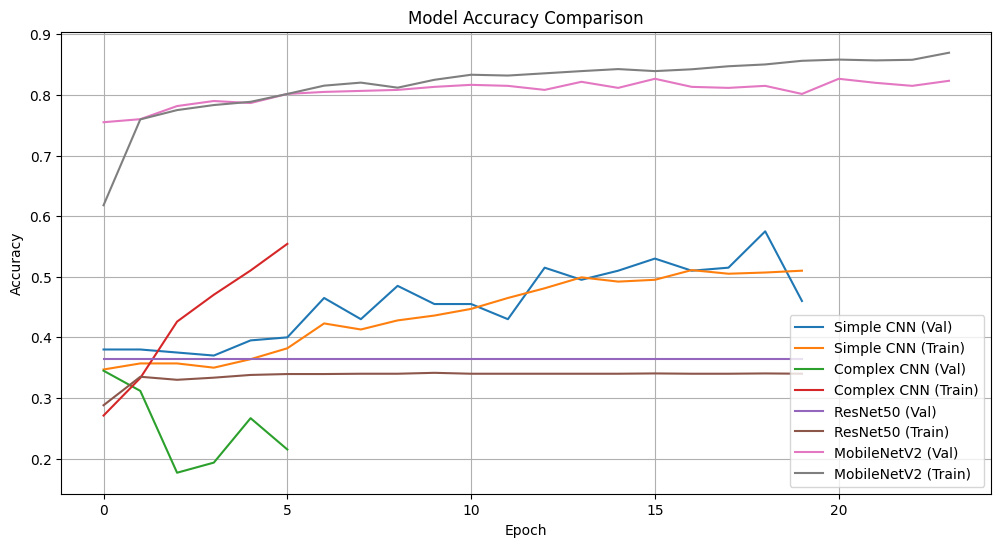

         Model  Test Accuracy  Best Val Accuracy  Epochs Trained  \
3  MobileNetV2          0.815           0.826667              24   
0   Simple CNN          0.460           0.575000              20   
2     ResNet50          0.365           0.365000              20   
1  Complex CNN          0.345           0.345000               6   

   Training Time  
3            276  
0            190  
2            190  
1             15  


In [16]:
def plot_model_comparisons(results_dict):
    plt.figure(figsize=(12, 6))
    for model_name, results in results_dict.items():
        plt.plot(results['history'].history['val_accuracy'], label=f'{model_name} (Val)')
        plt.plot(results['history'].history['accuracy'], label=f'{model_name} (Train)')
    
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

def create_summary_table(results_dict):
    summary_data = []
    for model_name, results in results_dict.items():
        summary_data.append({
            'Model': model_name,
            'Test Accuracy': results['test_accuracy'],
            'Best Val Accuracy': max(results['history'].history['val_accuracy']),
            'Epochs Trained': len(results['history'].history['accuracy']),
            'Training Time': sum(results['history'].epoch)  # Approximation
        })
    
    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values('Test Accuracy', ascending=False)
    return summary_df

# Prepare the results dictionary
results_dict = {
    'Simple CNN': simple_cnn_results,
    'Complex CNN': complex_cnn_results,
    'ResNet50': resnet_results,
    'MobileNetV2': mobilenet_results
}

# Plot the comparisons
plot_model_comparisons(results_dict)

# Create and display the summary table
summary_table = create_summary_table(results_dict)
print(summary_table)

**MobileNetV2:**

- Best performing model with 81.5% test accuracy and 82.67% best validation accuracy.
- Trained for 24 epochs, taking 276 time units.
- Shows consistent improvement in both training and validation accuracy.


**Simple CNN:**

- Second-best model with 46% test accuracy and 57.5% best validation accuracy.
- Trained for 20 epochs, taking 190 time units.
- Shows some fluctuation in validation accuracy but overall improvement.


**ResNet50:**

- Third-best model with 36.5% test accuracy and validation accuracy.
- Trained for 20 epochs, taking 190 time units.
- Shows very little improvement in validation accuracy over epochs.


**Complex CNN:**

- Lowest performing model with 34.5% test and validation accuracy.
- Only trained for 6 epochs, taking 15 time units.
- Shows rapid decline in validation accuracy, indicating overfitting.

## Hyperparameter Tuning
As we've seen, MobileNetV2 is our best performing model, we'll now perform hyperparameter tuning on it to further optimize it's performance.

In [23]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters
import matplotlib.pyplot as plt

# Constants
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32
SUBSET_SIZE = 3000

# Modify the data generators to resize images to 224x224
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_subset,
    directory=TRAIN_DIR,
    x_col="image",
    y_col="category",
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

def build_model(hp):
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(hp.Int('units', min_value=64, max_value=256, step=64), activation='relu'),
        Dropout(hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)),
        Dense(5, activation='softmax')
    ])

    model.compile(
        optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='keras_tuner_dir',
    project_name='mobilenetv2_tuning'
)

tuner.search(
    train_generator,
    epochs=5,
    validation_data=val_generator
)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the dense layer is {best_hps.get('units')} and the optimal learning rate for the optimizer is {best_hps.get('learning_rate'):.4f}.
The optimal dropout rate is {best_hps.get('dropout'):.2f}.
""")

Trial 5 Complete [00h 03m 37s]
val_accuracy: 0.7549999952316284

Best val_accuracy So Far: 0.7699999809265137
Total elapsed time: 01h 38m 28s

The hyperparameter search is complete. The optimal number of units in the dense layer is 480 and the optimal learning rate for the optimizer is 0.0089.
The optimal dropout rate is 0.00.



**Best Hyperparameters:**

- Number of units in the dense layer: 480
- Learning rate: 0.0089
- Dropout rate: 0.00

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 48s 1s/step - accuracy: 0.4317 - loss: 4.6594 - val_accuracy: 0.7050 - val_loss: 0.6819
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.7538 - loss: 0.6460 - val_accuracy: 0.7550 - val_loss: 0.6399
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8024 - loss: 0.4727 - val_accuracy: 0.7600 - val_loss: 0.5991
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8504 - loss: 0.3788 - val_accuracy: 0.7200 - val_loss: 0.7210
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 997ms/step - accuracy: 0.8418 - loss: 0.4056 - val_accuracy: 0.7600 - val_loss: 0.5814
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.8480 - loss: 0.3778 - val_accuracy: 0.7600 - val_loss: 0.5936
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.8126 - loss: 0.4391 - val_accuracy: 0.7500 - val_loss: 0.5820
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 35s 994ms/step - accuracy: 0.8700 - loss: 0.3516 - val_accuracy: 0.7200 - val

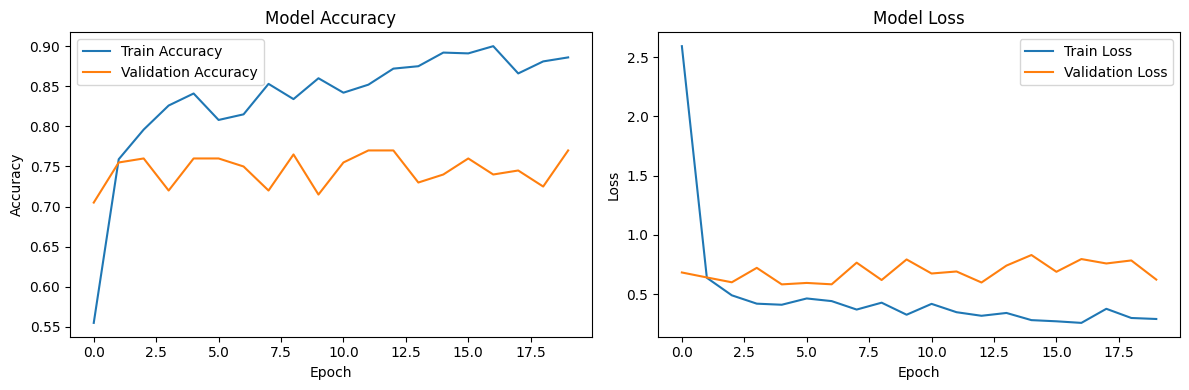

In [24]:
# Build the model with the optimal hyperparameters and train it on the data
model = tuner.hypermodel.build(best_hps)
history = model.fit(train_generator, epochs=20, validation_data=val_generator)

# Evaluate the model
val_loss, val_accuracy = model.evaluate(val_generator)
print(f"Validation accuracy: {val_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

**Validation Accuracy:**

- Best validation accuracy during hyperparameter search: 0.77 (77%)
- Final validation accuracy after 20 epochs: 0.77 (77%)


**Training Progress:**

- The model quickly reached a high training accuracy (around 85-90% in later epochs).
- Validation accuracy stabilized around 75-77% after the first few epochs.

## MobileNetV2 Model versus the Hyperparameter-Tuned MobileNetV2 Model

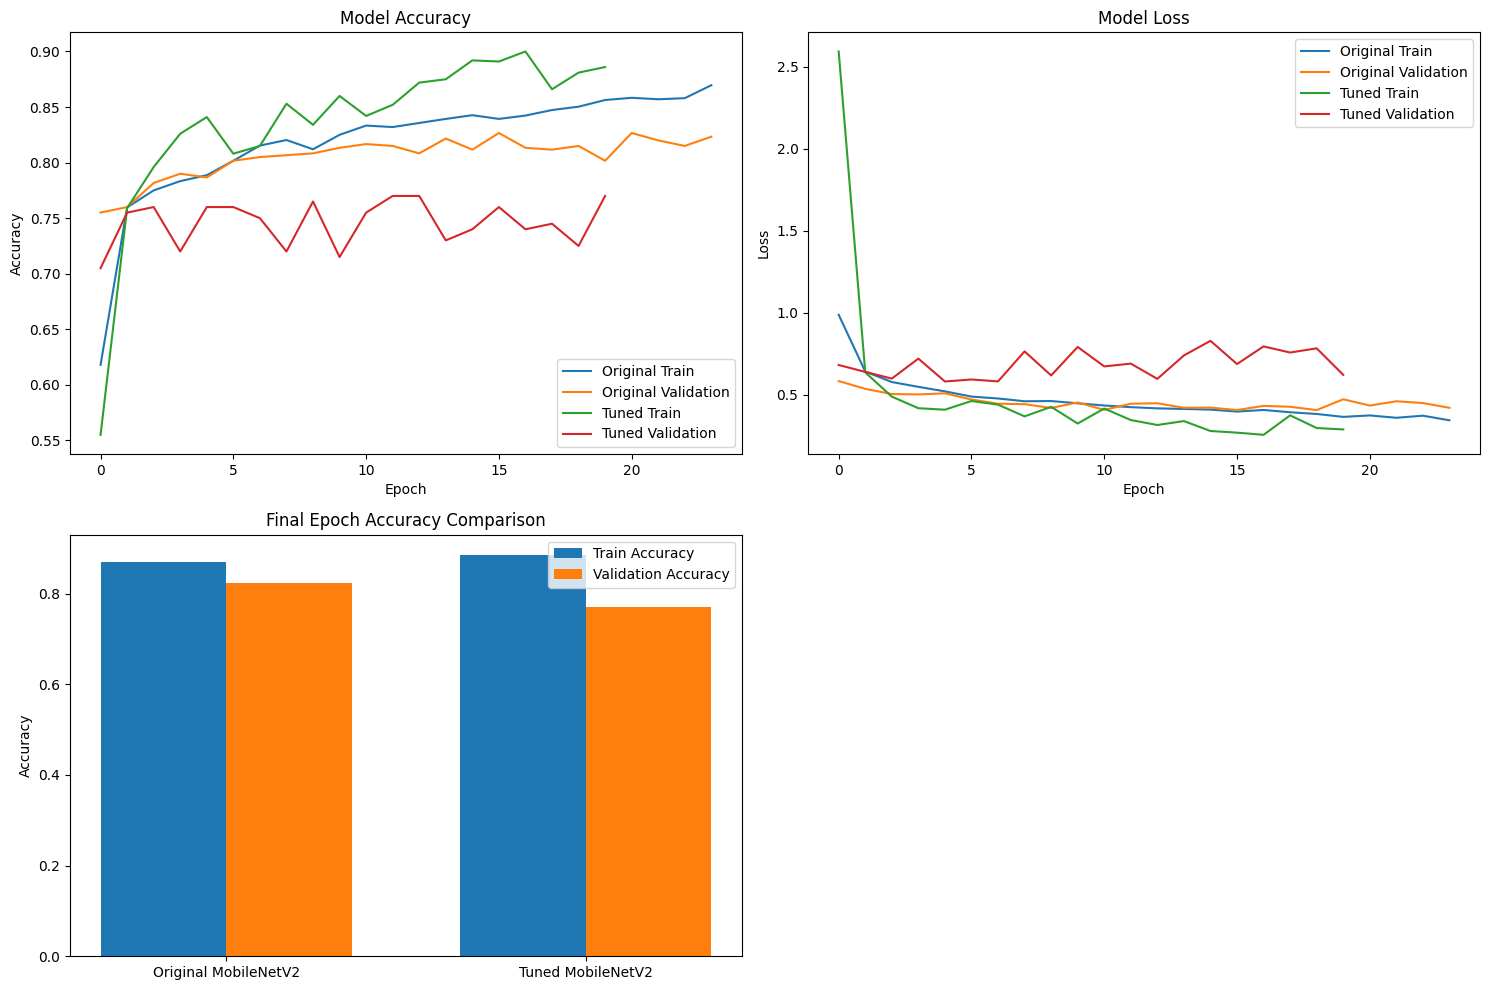

In [29]:
original_history = history_mobilenet  
tuned_history = history  

# Plotting
plt.figure(figsize=(15, 10))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(original_history.history['accuracy'], label='Original Train')
plt.plot(original_history.history['val_accuracy'], label='Original Validation')
plt.plot(tuned_history.history['accuracy'], label='Tuned Train')
plt.plot(tuned_history.history['val_accuracy'], label='Tuned Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Loss plot
plt.subplot(2, 2, 2)
plt.plot(original_history.history['loss'], label='Original Train')
plt.plot(original_history.history['val_loss'], label='Original Validation')
plt.plot(tuned_history.history['loss'], label='Tuned Train')
plt.plot(tuned_history.history['val_loss'], label='Tuned Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Final Epoch Comparison
plt.subplot(2, 2, 3)
models = ['Original MobileNetV2', 'Tuned MobileNetV2']
train_acc = [original_history.history['accuracy'][-1], tuned_history.history['accuracy'][-1]]
val_acc = [original_history.history['val_accuracy'][-1], tuned_history.history['val_accuracy'][-1]]

x = range(len(models))
width = 0.35

plt.bar([i - width/2 for i in x], train_acc, width, label='Train Accuracy')
plt.bar([i + width/2 for i in x], val_acc, width, label='Validation Accuracy')
plt.ylabel('Accuracy')
plt.title('Final Epoch Accuracy Comparison')
plt.xticks(x, models)
plt.legend()

plt.tight_layout()
plt.show()


## Results and Analysis

**Model Accuracy:**

- The original MobileNetV2 shows a more stable and higher validation accuracy throughout training.
- The tuned MobileNetV2 has a higher training accuracy but lower and more volatile validation accuracy, indicating overfitting.
- By the final epoch, the original model maintains a better balance between training and validation accuracy.


**Model Loss:**

- The original model shows consistent decrease in both training and validation loss.
- The tuned model's validation loss is higher and more erratic, further suggesting overfitting.


**Final Epoch Accuracy Comparison:**

- The original MobileNetV2 has a higher validation accuracy (around 82%) compared to its training accuracy (about 87%).
- The tuned MobileNetV2 shows a significant gap between training accuracy (about 89%) and validation accuracy (about 77%), clearly indicating overfitting

In [30]:

# Summary Table
summary_data = {
    'Model': ['Original MobileNetV2', 'Tuned MobileNetV2'],
    'Best Validation Accuracy': [max(original_history.history['val_accuracy']), max(tuned_history.history['val_accuracy'])],
    'Final Validation Accuracy': [original_history.history['val_accuracy'][-1], tuned_history.history['val_accuracy'][-1]],
    'Number of Epochs': [len(original_history.history['accuracy']), len(tuned_history.history['accuracy'])],
    'Dense Layer Units': ['Default', 480],
    'Learning Rate': ['Default', 0.0089],
    'Dropout Rate': ['Default', 0.00]
}

summary_df = pd.DataFrame(summary_data)
print(summary_df.to_string(index=False))

               Model  Best Validation Accuracy  Final Validation Accuracy  Number of Epochs Dense Layer Units Learning Rate Dropout Rate
Original MobileNetV2                  0.826667                   0.823333                24           Default       Default      Default
   Tuned MobileNetV2                  0.770000                   0.770000                20               480        0.0089          0.0


**Validation Accuracy:**

- Original MobileNetV2:

 - Best: 82.67%
 - Final: 82.33%


- Tuned MobileNetV2:

 - Best and Final: 77.00%

The original model outperforms the tuned model by about 5.67% in terms of best validation accuracy. This is a significant difference in favor of the original model.

**Number of Epochs:**

- Original: 24 epochs
- Tuned: 20 epochs

The original model trained for slightly longer, which might contribute to its better performance. However, the difference is not substantial.

**Model Architecture:**

- Original: Default configuration
- Tuned:

    - Dense Layer Units: 480
    - Learning Rate: 0.0089
    - Dropout Rate: 0.0

## Conclusion
In this project, we successfully compared the applicaion of various deep learning techniques in image classification.MobileNetV2, a pre-trained model, significantly outperformed custom-built CNNs, highlighting the power of transfer learning in image classification tasks. Surprisingly, the simpler models (Simple CNN and original MobileNetV2) outperformed more complex models (Complex CNN, ResNet50, and tuned MobileNetV2). This underscores that increased complexity doesn't always lead to better performance.The tuned MobileNetV2 model showed signs of overfitting, emphasizing the importance of regularization and careful model design

## Future Work
Though our project does a good job at ship image classfication however there are still many areas of improvements:
We can try implementing more sophisticated augmentation techniques such as ocean background augmentation or ship orientation changes.
We can implement Enemble method to improve overall accuracy.
